In [ ]:
# open in https://www.kaggle.com/code/vincentyeozekiel/heart-disease

In [1]:
import pandas as pd  # For loading data into a tabular format
import numpy as np   # For manipulating data
import matplotlib.pyplot as plt  # For graph plotting
import seaborn as sns  # For graph plotting
from sklearn.preprocessing import LabelEncoder  # For label encoding in EDA
from sklearn.utils import resample   # For data sampling in EDA
from sklearn.utils import shuffle   # For shuffling the data

<h2>Load the Data

In [2]:
#Import Dataset ke Pandas Dataframe
disease=pd.read_csv('../input/heart-disease-dataset/heart.csv')

In [3]:
disease.info()
#Tidak ada nilai kosong pada dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


age\
sex (1=male, 0=female)\
chest pain type (4 values)\
resting blood pressure\
serum cholestoral in mg/dl\
fasting blood sugar > 120 mg/dl\
resting electrocardiographic results (values 0,1,2)\
maximum heart rate achieved\
exercise induced angina\
oldpeak = ST depression induced by exercise relative to rest\
the slope of the peak exercise ST segment\
number of major vessels (0-3) colored by flourosopy\
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [5]:
#disease2=disease.drop_duplicates()
#df.duplicated(keep=first)
#disease2.info()

In [6]:
disease.corr()['target']

age        -0.229324
sex        -0.279501
cp          0.434854
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
target      1.000000
Name: target, dtype: float64

Korelasi positif pada data cp, thalach, dan slope. Sedangkan korelasi negatif pada exang dan oldpeak

<h1>Visualisasi Data

Jenis Chest Pain, Elektrokardiografik, dan Slope berkorelasi positif

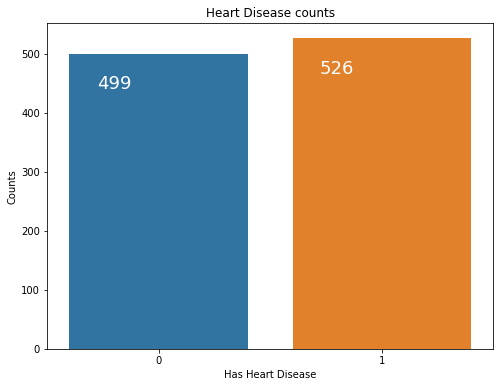

Perbedaan data yang terkena serangan jantung tidak terlalu jauh


In [7]:
plt.figure(figsize=(8, 6))
cplot1=sns.countplot(x='target', data=disease)

for p in cplot1.patches:
    cplot1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

plt.title('Heart Disease counts')
plt.ylabel('Counts')             
plt.xlabel('Has Heart Disease')
plt.show()
print('Perbedaan data yang terkena serangan jantung tidak terlalu jauh')

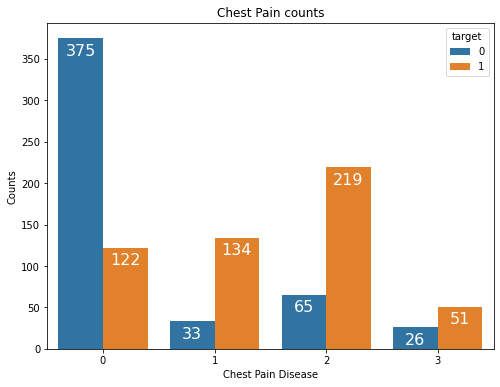

In [8]:
plt.figure(figsize=(8, 6))
cplot1=sns.countplot(x='cp',hue='target', data=disease)

for p in cplot1.patches:
    cplot1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+15), ha='center', va='top', color='white', size=16)

plt.title('Chest Pain counts')
plt.ylabel('Counts')             
plt.xlabel('Chest Pain Disease')
plt.show()

In [9]:
cp_count=disease[['cp','target']].value_counts().sort_index()
persentage=np.empty(4, dtype=int)
for i in range (0,4):
    x,y=cp_count[i]
    persentage[i]=(y/(x+y))*100
print(persentage)
print('Penyakit CP tipe 1 yang berpeluang tinggi terkena serangan jantung')

[24 80 77 66]
Penyakit CP tipe 1 yang berpeluang tinggi terkena serangan jantung


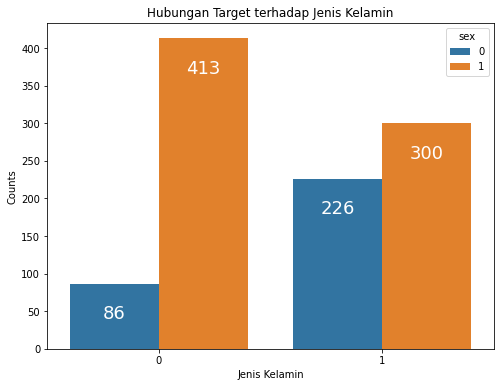

pria memiliki peluang terkena penyakit jantung lebih tinggi daripada wanita


In [10]:
plt.figure(figsize=(8, 6))
cplot1=sns.countplot(x='target', hue='sex',data=disease)

#1=male, 0=female
for p in cplot1.patches:
    cplot1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

plt.title('Hubungan Target terhadap Jenis Kelamin')
plt.ylabel('Counts')             
plt.xlabel('Jenis Kelamin')
plt.show()
print('pria memiliki peluang terkena penyakit jantung lebih tinggi daripada wanita')

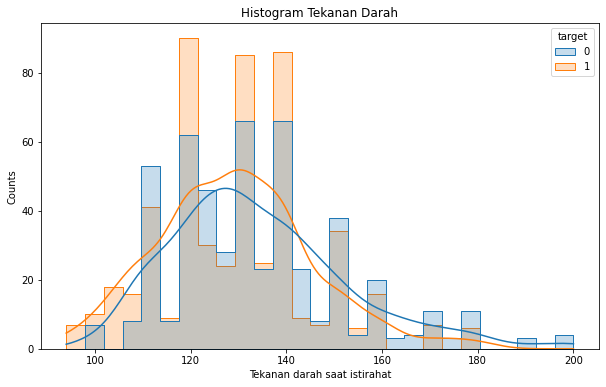

Tekanan darah saat istirahat terhadap penyakit jantung berdistribusi chi square


In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(x='trestbps', hue='target', data=disease, kde=True, element='step')
plt.title('Histogram Tekanan Darah')
plt.ylabel('Counts')             
plt.xlabel('Tekanan darah saat istirahat')
plt.show()
print("Tekanan darah saat istirahat terhadap penyakit jantung berdistribusi chi square")

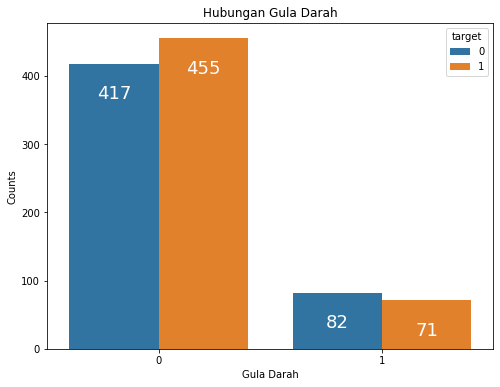

tidak dapat disimpulkan


In [12]:
plt.figure(figsize=(8, 6))
cplot1=sns.countplot(x='fbs', hue='target',data=disease)

for p in cplot1.patches:
    cplot1.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)

plt.title('Hubungan Gula Darah')
plt.ylabel('Counts')             
plt.xlabel('Gula Darah')
plt.show()
print('tidak dapat disimpulkan')

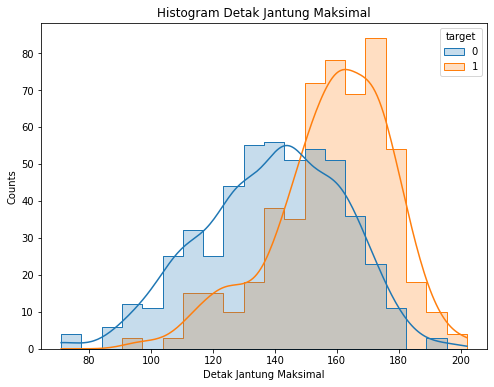

Data detak jantung maksimal terhadap penyakit jantung berdistribusi normal
Detak jantung mencapai puncak di 160 yang terkena penyakit jantung dan 140 yang tidak terkena penyakit jantung


In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(x='thalach', hue='target', data=disease, kde=True, element='step')
plt.title('Histogram Detak Jantung Maksimal')
plt.ylabel('Counts')             
plt.xlabel('Detak Jantung Maksimal')
plt.show()
print("Data detak jantung maksimal terhadap penyakit jantung berdistribusi normal")
print('Detak jantung mencapai puncak di 160 yang terkena penyakit jantung dan 140 yang tidak terkena penyakit jantung')

**Memeriksa Outliers**

<AxesSubplot:xlabel='age'>

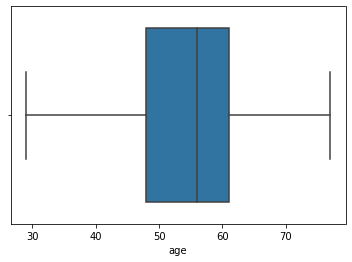

In [14]:
sns.boxplot(data=disease, x='age')

<AxesSubplot:xlabel='thalach'>

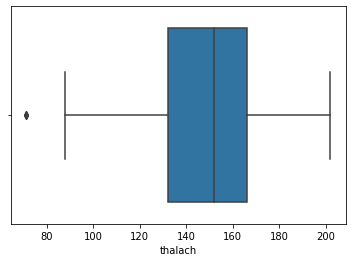

In [15]:
sns.boxplot(data=disease, x='thalach')

<AxesSubplot:xlabel='oldpeak'>

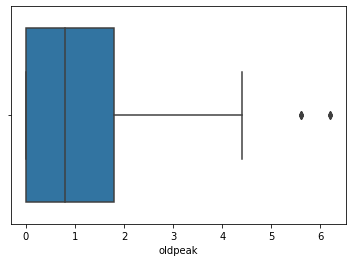

In [16]:
sns.boxplot(data=disease, x='oldpeak')

In [17]:
#Fungsi mendapatkan IQR dan membuang outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    new_df = df[(df[feature] > lower_limit) & (df[feature] < upper_limit)]
    return new_df

In [18]:
#Membuang Outlier
disease_clean=outliers(disease, 'thalach')
disease_clean=outliers(disease_clean, 'oldpeak')
disease_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1014 non-null   int64  
 1   sex       1014 non-null   int64  
 2   cp        1014 non-null   int64  
 3   trestbps  1014 non-null   int64  
 4   chol      1014 non-null   int64  
 5   fbs       1014 non-null   int64  
 6   restecg   1014 non-null   int64  
 7   thalach   1014 non-null   int64  
 8   exang     1014 non-null   int64  
 9   oldpeak   1014 non-null   float64
 10  slope     1014 non-null   int64  
 11  ca        1014 non-null   int64  
 12  thal      1014 non-null   int64  
 13  target    1014 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 118.8 KB


<h2>EDA<h2>

In [19]:
total_target=disease_clean['target'].value_counts()
total_target

1    526
0    488
Name: target, dtype: int64

In [20]:
#Mencari nilai terkecil pada target
min_value=min(total_target[0], total_target[1])
min_value
min_key=0

In [21]:
# Check for duplicates
disease_clean[disease_clean.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [22]:
disease_clean.drop_duplicates(inplace=True)
disease_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    int64  
 2   cp        299 non-null    int64  
 3   trestbps  299 non-null    int64  
 4   chol      299 non-null    int64  
 5   fbs       299 non-null    int64  
 6   restecg   299 non-null    int64  
 7   thalach   299 non-null    int64  
 8   exang     299 non-null    int64  
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    int64  
 11  ca        299 non-null    int64  
 12  thal      299 non-null    int64  
 13  target    299 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.0 KB


In [23]:
disease_clean['target'].value_counts()

1    164
0    135
Name: target, dtype: int64

In [24]:
# Perform downsampling to neutralize the number of data for each label

#def downsampling(df, target_class, min_key, min_value):
#    df_process = df[df[target_class]==min_key]
#    for target in df[target_class].unique():
#        if target != min_key:
#            class_downsample = resample(df[df[target_class]==target], replace=False, n_samples=min_value, random_state=24)
#            df_process = pd.concat([df_process, class_downsample])
#    return shuffle(df_process).reset_index(drop=True)

#disease_downsampled = downsampling(disease_clean, 'target', min_key, min_value)

In [25]:
disease_clean.info()
print()
print('Tidak Ada Nilai Kosong')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    int64  
 2   cp        299 non-null    int64  
 3   trestbps  299 non-null    int64  
 4   chol      299 non-null    int64  
 5   fbs       299 non-null    int64  
 6   restecg   299 non-null    int64  
 7   thalach   299 non-null    int64  
 8   exang     299 non-null    int64  
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    int64  
 11  ca        299 non-null    int64  
 12  thal      299 non-null    int64  
 13  target    299 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.0 KB

Tidak Ada Nilai Kosong


<h2>Preprocessing Data<h2>

In [26]:
from sklearn.model_selection import train_test_split   # To split train val test set
from sklearn.pipeline import Pipeline      # To create pipeline for data transformation
from sklearn.impute import SimpleImputer     # To impute missing values
from sklearn.preprocessing import StandardScaler     # To standardize the data
from sklearn.metrics import accuracy_score    # To calculate the accuracy

In [27]:
classification_target="target"
num_attributes=disease_clean.drop(['target'], axis=1).columns
num_attributes

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [28]:
# Split data into train. valid, and test set
X_data, y_data = disease_clean[num_attributes], disease_clean[classification_target]
X, X_test, y, y_test = train_test_split(X_data, y_data, test_size = 0.3, stratify=y_data, random_state=24)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=24)

In [29]:
# Create pipeline to transform numerical attributes
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [30]:
# Preprocess the data
def preprocess_data_classification(df, num_attributes, num_pipeline, train=True):
    if train:
        num_df = num_pipeline.fit_transform(df[num_attributes])
        preprocess_df = pd.DataFrame(num_df, columns=num_attributes)
    else:
        num_df = num_pipeline.transform(df[num_attributes])
        preprocess_df = pd.DataFrame(num_df, columns=num_attributes)
    return preprocess_df

X_train_classification = preprocess_data_classification(X_train, num_attributes, num_pipeline, train=True)
X_valid_classification = preprocess_data_classification(X_valid, num_attributes, num_pipeline, train=False)
X_test_classification = preprocess_data_classification(X_test, num_attributes, num_pipeline, train=False)

<h2>Classification Task<h2>

In [31]:
# Train with KNN
from sklearn.neighbors import KNeighborsClassifier

n = 5
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(X_train_classification, y_train)

prediction = knn.predict(X_valid_classification)
print(n, accuracy_score(prediction, y_valid))

5 0.8571428571428571


In [32]:
# Hyperparameter tuning KNN
from sklearn.neighbors import KNeighborsClassifier

for n in range(4, 8):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_classification, y_train)

    prediction = knn.predict(X_valid_classification)
    print(n, accuracy_score(prediction, y_valid))

4 0.8412698412698413
5 0.8571428571428571
6 0.8412698412698413
7 0.8412698412698413


In [33]:
# Train with Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=150)
lr.fit(X_train_classification, y_train)

prediction = lr.predict(X_valid_classification)
print(accuracy_score(prediction, y_valid))

0.8253968253968254


In [34]:
# Train with Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=24)
dt.fit(X_train_classification, y_train)

prediction = dt.predict(X_valid_classification)
print(accuracy_score(prediction, y_valid))

0.7142857142857143


In [35]:
# Hyperparameter with Decision Tree
max_depth = range(1, 15)
max_leaf_nodes = range(10, 100, 5)
for depth in max_depth:
    for leaf in max_leaf_nodes:
        dt = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=leaf, random_state=24)
        dt.fit(X_train_classification, y_train)

        prediction = dt.predict(X_valid_classification)
        print("Depth: {}, Leaf: {}, Acc: {}".format(depth, leaf, accuracy_score(prediction, y_valid)))

Depth: 1, Leaf: 10, Acc: 0.7936507936507936
Depth: 1, Leaf: 15, Acc: 0.7936507936507936
Depth: 1, Leaf: 20, Acc: 0.7936507936507936
Depth: 1, Leaf: 25, Acc: 0.7936507936507936
Depth: 1, Leaf: 30, Acc: 0.7936507936507936
Depth: 1, Leaf: 35, Acc: 0.7936507936507936
Depth: 1, Leaf: 40, Acc: 0.7936507936507936
Depth: 1, Leaf: 45, Acc: 0.7936507936507936
Depth: 1, Leaf: 50, Acc: 0.7936507936507936
Depth: 1, Leaf: 55, Acc: 0.7936507936507936
Depth: 1, Leaf: 60, Acc: 0.7936507936507936
Depth: 1, Leaf: 65, Acc: 0.7936507936507936
Depth: 1, Leaf: 70, Acc: 0.7936507936507936
Depth: 1, Leaf: 75, Acc: 0.7936507936507936
Depth: 1, Leaf: 80, Acc: 0.7936507936507936
Depth: 1, Leaf: 85, Acc: 0.7936507936507936
Depth: 1, Leaf: 90, Acc: 0.7936507936507936
Depth: 1, Leaf: 95, Acc: 0.7936507936507936
Depth: 2, Leaf: 10, Acc: 0.8095238095238095
Depth: 2, Leaf: 15, Acc: 0.8095238095238095
Depth: 2, Leaf: 20, Acc: 0.8095238095238095
Depth: 2, Leaf: 25, Acc: 0.8095238095238095
Depth: 2, Leaf: 30, Acc: 0.80952

In [36]:
dt = DecisionTreeClassifier(max_depth=14, max_leaf_nodes=80, random_state=24)
dt.fit(X_train_classification, y_train)
prediction = dt.predict(X_test_classification)
accuracy_score(prediction, y_test)
# print("Depth: {}, Leaf: {}, Acc: {}".format(depth, leaf, accuracy_score(prediction, y_valid)))

0.8333333333333334

In [37]:
dt = DecisionTreeClassifier(random_state=24)
dt.fit(X_train_classification, y_train)
prediction = dt.predict(X_test_classification)
accuracy_score(prediction, y_test)
# print("Depth: {}, Leaf: {}, Acc: {}".format(depth, leaf, accuracy_score(prediction, y_valid)))

0.7888888888888889

In [38]:
# Train with Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=24)
rf.fit(X_train_classification, y_train)

prediction = rf.predict(X_valid_classification)
print(accuracy_score(prediction, y_valid))

0.8253968253968254


In [39]:
# Hyperparameter tuning with Random Forest
max_depth = range(1, 15)
max_leaf_nodes = range(10, 100, 5)
for depth in max_depth:
    for leaf in max_leaf_nodes:
        rf = RandomForestClassifier(max_depth=depth, max_leaf_nodes=leaf, random_state=24)
        rf.fit(X_train_classification, y_train)

        prediction = rf.predict(X_valid_classification)
        print("Depth: {}, Leaf: {}, Acc: {}".format(depth, leaf, accuracy_score(prediction, y_valid)))

Depth: 1, Leaf: 10, Acc: 0.8888888888888888
Depth: 1, Leaf: 15, Acc: 0.8888888888888888
Depth: 1, Leaf: 20, Acc: 0.8888888888888888
Depth: 1, Leaf: 25, Acc: 0.8888888888888888
Depth: 1, Leaf: 30, Acc: 0.8888888888888888
Depth: 1, Leaf: 35, Acc: 0.8888888888888888
Depth: 1, Leaf: 40, Acc: 0.8888888888888888
Depth: 1, Leaf: 45, Acc: 0.8888888888888888
Depth: 1, Leaf: 50, Acc: 0.8888888888888888
Depth: 1, Leaf: 55, Acc: 0.8888888888888888
Depth: 1, Leaf: 60, Acc: 0.8888888888888888
Depth: 1, Leaf: 65, Acc: 0.8888888888888888
Depth: 1, Leaf: 70, Acc: 0.8888888888888888
Depth: 1, Leaf: 75, Acc: 0.8888888888888888
Depth: 1, Leaf: 80, Acc: 0.8888888888888888
Depth: 1, Leaf: 85, Acc: 0.8888888888888888
Depth: 1, Leaf: 90, Acc: 0.8888888888888888
Depth: 1, Leaf: 95, Acc: 0.8888888888888888
Depth: 2, Leaf: 10, Acc: 0.8412698412698413
Depth: 2, Leaf: 15, Acc: 0.8412698412698413
Depth: 2, Leaf: 20, Acc: 0.8412698412698413
Depth: 2, Leaf: 25, Acc: 0.8412698412698413
Depth: 2, Leaf: 30, Acc: 0.84126

In [40]:
rf = RandomForestClassifier(max_depth=1, max_leaf_nodes=50, random_state=24)
rf.fit(X_train_classification, y_train)
prediction = rf.predict(X_valid_classification)
accuracy_score(prediction, y_valid)

# print("Depth: {}, Leaf: {}, Acc: {}".format(depth, leaf, accuracy_score(prediction, y_valid)))

0.8888888888888888

<h1>Kesimpulan
    

Model Random Forest mendapatkan nilai prediksi yang tertinggi dengan hyperparameter depth =1.

Dari hasil EDA, dataset tidak ada nilai kosong dan tipe kategori sudah dinyatakan dalam bentuk int, namun ada sekitar 715 kolom duplikasi.